In [1]:
import cPickle
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

roidb_path = '../model/res50-fpn/coco/alternate_minitrain/cache/coco_roidb_with_mask_rcnn1.pkl'

roidb = cPickle.load(open(roidb_path, 'r'))
num_imgs = len(roidb)
print(num_imgs)

12822


(2001, 2001, 2001)
12


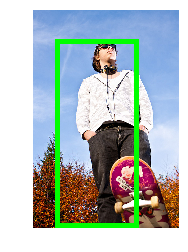

In [14]:
im_i = np.random.randint(0, num_imgs)
img_path = roidb[im_i]['image']
rois = roidb[im_i]['boxes']
max_overlaps = roidb[im_i]['max_overlaps']
max_classes = roidb[im_i]['max_classes']

print(len(rois), len(max_overlaps), len(max_classes))
print(len(np.where(max_overlaps >= 0.5)[0]))
im = Image.open(img_path)
plt.imshow(im)

for i in range(len(rois)):
    isGt, isFg = False, False
    linewidth = 1.5
    if max_overlaps[i] == 1:
        isGt = True
        color = 'lime'
        linewidth = 5
    elif max_overlaps[i] >= 0.5:
        continue
#         isFG = True
#         color = 'r'
    else:
        continue
    bbox = rois[i]
    rect = plt.Rectangle((bbox[0], bbox[1]),
                         bbox[2] - bbox[0],
                         bbox[3] - bbox[1], fill=False,
                         edgecolor=color, linewidth=linewidth)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()

In [ ]:
import os
save_dir = '../output/rois_mini/'

for im_i in range(num_imgs):

    img_path = roidb[im_i]['image']
    rois = roidb[im_i]['boxes']
    max_overlaps = roidb[im_i]['max_overlaps']
    max_classes = roidb[im_i]['max_classes']

    print(len(rois), len(max_overlaps), len(max_classes))
    print(len(np.where(max_overlaps >= 0.5)[0]))
    im = Image.open(img_path)
    plt.figure(figsize=(8,6))
    plt.imshow(im)

    for i in range(len(rois)):
        isGt, isFg = False, False
        linewidth = 1.5
        if max_overlaps[i] == 1:
            isGt = True
            color = 'lime'
            linewidth = 5
        elif max_overlaps[i] >= 0.5:
            isFG = True
            color = 'r'
        else:
            continue
        bbox = rois[i]
        rect = plt.Rectangle((bbox[0], bbox[1]),
                             bbox[2] - bbox[0],
                             bbox[3] - bbox[1], fill=False,
                             edgecolor=color, linewidth=linewidth)
        plt.gca().add_patch(rect)

    plt.axis('off')
    plt.savefig(os.path.join(save_dir, os.path.basename(img_path)))
    plt.close('all')